In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time
import datetime as dt
from datetime import date, datetime, timedelta

In [2]:
p1 = Path.cwd() / 'data'

In [3]:
pd.to_datetime(pd.Series([10, 100, 1000, 10000]), unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [7]:
date = date(year=2013, month=6, day=7)
time = dt.time(hour=12, minute=30, second=19, microsecond=463198)

In [8]:
td = timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=7)
td

datetime.timedelta(days=19, seconds=37207)

In [9]:
date + td

datetime.date(2013, 6, 26)

In [10]:
pd.Timestamp('2016-01-10')

Timestamp('2016-01-10 00:00:00')

In [11]:
pd.to_datetime('2015-05-13')

Timestamp('2015-05-13 00:00:00')

In [12]:
pd.to_datetime(100, unit='D', origin='2013-01-01')

Timestamp('2013-04-11 00:00:00')

In [13]:
pd.to_datetime(pd.Series([10, 100, 1000, 10000]), unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [20]:
pd.to_datetime(pd.Series(['12-5-2015', '14-1-2013', '20-12-2017', '40-23-2017']), dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [21]:
pd.DateOffset(years=6, months=5, days=3, hours=12, minutes=6)

<DateOffset: days=3, hours=12, minutes=6, months=5, years=6>

In [23]:
ts = pd.to_datetime('2016-10-1 04:23:23')
ts.ceil('h'), ts.ceil('12h'), ts.floor('12h'), ts.floor('min')

(Timestamp('2016-10-01 05:00:00'),
 Timestamp('2016-10-01 12:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-10-01 04:23:00'))

In [24]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [25]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [26]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23)

In [27]:
td.total_seconds()

1678807.0

In [29]:
crime = pd.read_hdf(p1 / 'crime.h5', 'crime')
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [31]:
crime.loc['2016-05-12'].shape

(243, 7)

In [33]:
crime.sort_index().loc['2015-03-04':'2015-12-31']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [35]:
crime.index.dtype, crime.index[:2]

(dtype('<M8[ns]'),
 DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None))

In [37]:
crime = pd.read_hdf(p1 / 'crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [38]:
crime[crime['REPORTED_DATE'] == '2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [40]:
crime[crime['REPORTED_DATE'].between('2016-05-12', '2016-05-13', inclusive='both')].sort_values(by='REPORTED_DATE')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
310555,public-order-crimes-other,all-other-crimes,2016-05-12 00:05:00,-104.987417,39.727275,civic-center,1,0
315074,curfew,public-disorder,2016-05-12 00:07:00,-104.987432,39.726668,lincoln-park,1,0
312836,traf-other,all-other-crimes,2016-05-12 00:13:00,-105.053191,39.719419,barnum-west,1,0
310538,police-false-information,all-other-crimes,2016-05-12 00:33:00,-104.965948,39.764498,cole,1,0
311301,traf-habitual-offender,all-other-crimes,2016-05-12 01:01:00,-104.902327,39.771602,stapleton,1,0
...,...,...,...,...,...,...,...,...
299407,traf-other,all-other-crimes,2016-05-12 23:50:00,-104.940571,39.764474,clayton,1,0
304599,violation-of-restraining-order,all-other-crimes,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
315139,criminal-trespassing,all-other-crimes,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0


In [42]:
crime[crime['REPORTED_DATE'].between('2016-05', '2016-05-31 23:59:59', inclusive='both')].sort_values(by='REPORTED_DATE')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
289289,theft-other,larceny,2016-05-01 00:03:00,-104.948370,39.740322,city-park,1,0
283336,criminal-mischief-other,public-disorder,2016-05-01 00:09:00,-104.963126,39.738641,cheesman-park,1,0
283335,threats-to-injure,public-disorder,2016-05-01 00:09:00,-104.963126,39.738641,cheesman-park,1,0
289275,disturbing-the-peace,public-disorder,2016-05-01 00:09:00,-104.963126,39.738641,cheesman-park,1,0
165247,vehicular-eluding-no-chase,all-other-crimes,2016-05-01 00:27:00,-105.022877,39.692959,ruby-hill,1,0
...,...,...,...,...,...,...,...,...
316279,traf-habitual-offender,all-other-crimes,2016-05-31 23:31:00,-104.903518,39.683885,indian-creek,1,0
317825,public-order-crimes-other,all-other-crimes,2016-05-31 23:31:00,-104.903518,39.683885,indian-creek,1,0
311934,burglary-residence-no-force,burglary,2016-05-31 23:34:00,-104.886163,39.741763,east-colfax,1,0
314189,assault-dv,other-crimes-against-persons,2016-05-31 23:34:00,-104.886163,39.741763,east-colfax,1,0


In [43]:
pd.date_range(start='2023-11-01', end='2023-11-30', freq='D')

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04',
               '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20',
               '2023-11-21', '2023-11-22', '2023-11-23', '2023-11-24',
               '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28',
               '2023-11-29', '2023-11-30'],
              dtype='datetime64[ns]', freq='D')

In [45]:
crime = crime.set_index('REPORTED_DATE').sort_index()
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2017-09-29 03:58:00,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0
2017-09-29 04:12:00,traf-other,all-other-crimes,-105.006426,39.783139,sunnyside,1,0


In [49]:
crime.between_time('2:00', '5:00', inclusive='left')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0
2012-01-03 04:18:00,burglary-business-by-force,burglary,-104.941613,39.783624,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2017-09-29 03:54:00,burglary-business-no-force,burglary,-104.987489,39.674562,rosedale,1,0
2017-09-29 03:58:00,traf-other,all-other-crimes,-104.994817,39.768043,globeville,1,0
2017-09-29 03:58:00,burglary-business-by-force,burglary,-104.987803,39.681199,overland,1,0


In [50]:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-15 05:47:00,burglary-business-by-force,burglary,-104.967844,39.678296,university,1,0
2012-05-26 05:47:00,assault-simple,other-crimes-against-persons,-104.991880,39.753646,five-points,1,0
2012-06-10 05:47:00,aggravated-assault,aggravated-assault,-105.020598,39.676478,college-view-south-platte,1,0
2012-07-04 05:47:00,sex-aslt-rape,sexual-assault,NaN,NaN,west-highland,1,0
2012-07-09 05:47:00,theft-of-motor-vehicle,auto-theft,-105.030215,39.708802,westwood,1,0
...,...,...,...,...,...,...,...
2017-06-25 05:47:00,traffic-accident-hit-and-run,traffic-accident,-104.984483,39.732239,capitol-hill,0,1
2017-06-28 05:47:00,burglary-business-by-force,burglary,-104.941615,39.788373,elyria-swansea,1,0
2017-07-22 05:47:00,aggravated-assault,aggravated-assault,-104.979723,39.753738,five-points,1,0


In [52]:
crime.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [53]:
crime.first('5W')

C:\Users\admin\AppData\Local\Temp\ipykernel_4604\1308769652.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  crime.first('5W')


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-04 23:15:00,fraud-criminal-impersonation,white-collar-crime,-105.039309,39.747576,sloan-lake,1,0
2012-02-04 23:33:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.939168,39.685507,virginia-village,1,0
2012-02-04 23:48:00,burglary-residence-no-force,burglary,-105.007930,39.695613,ruby-hill,1,0


In [59]:
pd.to_datetime('2012-01-16') + pd.DateOffset(years=1, months=1)

Timestamp('2013-02-16 00:00:00')

In [66]:
crime.resample('YS').size()

REPORTED_DATE
2012-01-01    57037
2013-01-01    69527
2014-01-01    84421
2015-01-01    89148
2016-01-01    91076
2017-01-01    69702
Freq: AS-JAN, dtype: int64

In [67]:
crime.groupby(pd.Grouper(freq='YS')).size()

REPORTED_DATE
2012-01-01    57037
2013-01-01    69527
2014-01-01    84421
2015-01-01    89148
2016-01-01    91076
2017-01-01    69702
Freq: AS-JAN, dtype: int64

In [68]:
crime.resample('W').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [71]:
crime.groupby(pd.Grouper(freq='W')).size().equals(crime.resample('W').size())

True

In [72]:
crime2 = crime.reset_index()

In [73]:
crime2.resample('W', on='REPORTED_DATE').size()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

<AxesSubplot:xlabel='REPORTED_DATE'>

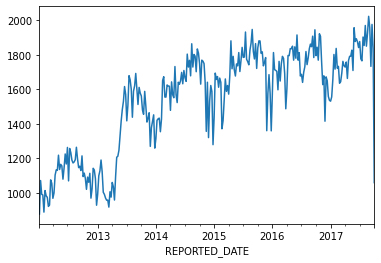

In [75]:
crime2.groupby(pd.Grouper(freq='W', key='REPORTED_DATE')).size().plot()

In [77]:
(crime
 .resample('QS')[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
2013-04-01,12259,4510
2013-07-01,15799,4942
2013-10-01,13910,4968
2014-01-01,14487,5021


<AxesSubplot:xlabel='REPORTED_DATE'>

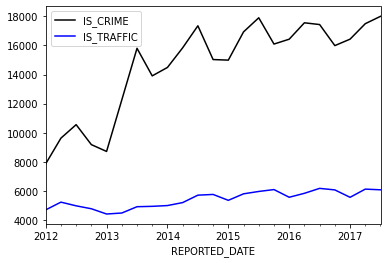

In [79]:
(crime
 .groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .plot(color=['black', 'blue'])
)

In [80]:
q_crime = (crime
 .resample('QS')[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)
q_crime

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
2013-04-01,12259,4510
2013-07-01,15799,4942
2013-10-01,13910,4968
2014-01-01,14487,5021


In [87]:
(q_crime
 .assign(UP_CRIME=lambda df: df['IS_CRIME'].sub(df['IS_CRIME'].shift(1)).div(df['IS_CRIME'].shift(1)).mul(100).round(2).fillna(0),
         UP_TRAFFIC=lambda df: df['IS_TRAFFIC'].sub(df['IS_TRAFFIC'].shift(1)).div(df['IS_TRAFFIC'].shift(1)).mul(100).round(2).fillna(0))
)

,IS_CRIME,IS_TRAFFIC,UP_CRIME,UP_TRAFFIC
REPORTED_DATE,,,,
2012-01-01,7882,4726,0.00,0.00
2012-04-01,9641,5255,22.32,11.19
2012-07-01,10566,5003,9.59,-4.80
2012-10-01,9197,4802,-12.96,-4.02
2013-01-01,8730,4442,-5.08,-7.50
2013-04-01,12259,4510,40.42,1.53
2013-07-01,15799,4942,28.88,9.58
2013-10-01,13910,4968,-11.96,0.53
2014-01-01,14487,5021,4.15,1.07
